In [12]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sts
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime


In [2]:
# read the data
df = pd.read_csv('AusApparalSales4thQrt2020.csv')

df.head()

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000
2,1-Oct-2020,Morning,WA,Women,4,10000
3,1-Oct-2020,Morning,WA,Seniors,15,37500
4,1-Oct-2020,Afternoon,WA,Kids,3,7500


### Check for missing values

In [20]:
df.isna().sum()

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

In [21]:
df.describe()

,Unit,Sales
count,7560.000000,7560.000000
mean,18.005423,45013.558201
std,12.901403,32253.506944
min,2.000000,5000.000000
25%,8.000000,20000.000000
50%,14.000000,35000.000000
75%,26.000000,65000.000000
max,65.000000,162500.000000


### Initial Observations:

1. The dataset contains 7,560 records for both Unit and Sales columns.

2. Units sold:
   - Average units per transaction: 18 units
   - Median (50th percentile): 14 units
   - Range: 2 units (min) to 65 units (max)
   - Standard deviation: ~13 units shows moderate variability

3. Sales amounts:
   - Average sale: AUD 45,013.56
   - Median sale: AUD 35,000
   - Range: AUD 5,000 (min) to AUD 162,500 (max) 
   - Standard deviation: AUD 32,253.51 indicates high variability in sales amounts

4. Distribution:
   - Both Units and Sales show right-skewed distributions since mean > median
   - 50% of transactions fall between 8-26 units and AUD 20,000-65,000 in sales


In [22]:
df.columns

Index(['Date', 'Time', 'State', 'Group', 'Unit', 'Sales'], dtype='object')

### Grouping total sales and units by state

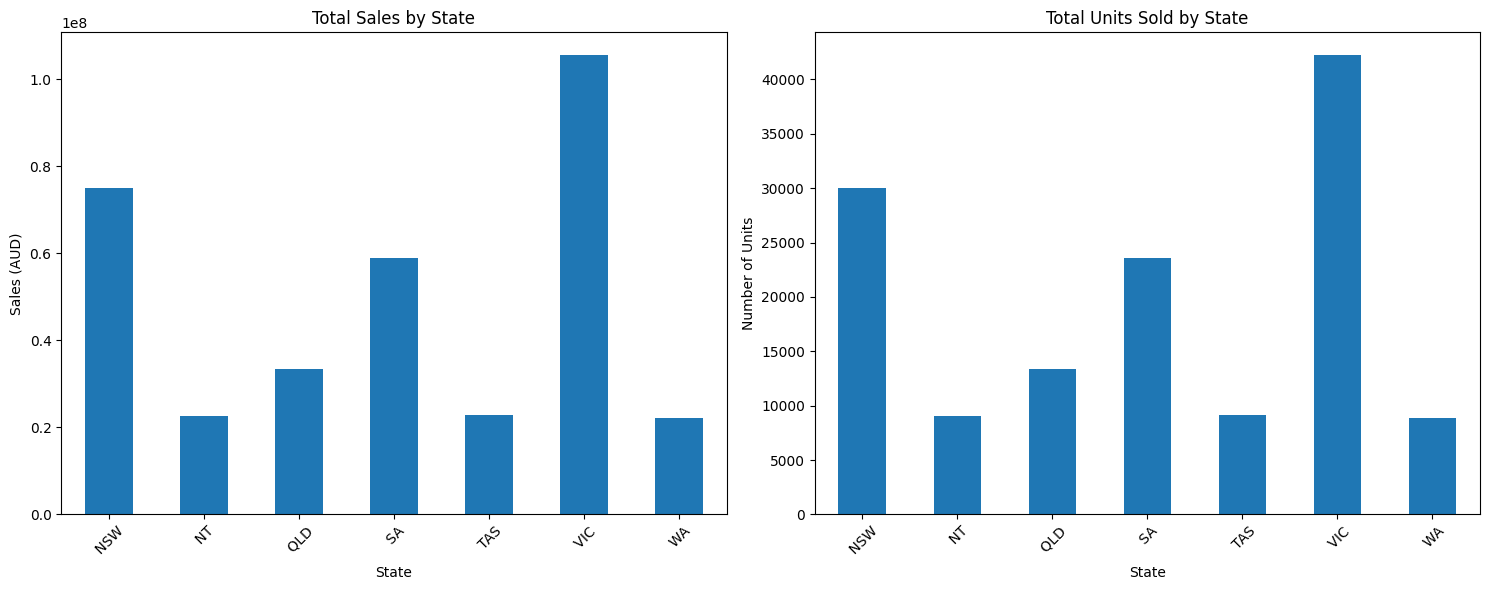

In [23]:
# Create a figure with two subplots side by side
plt.figure(figsize=(15,6))

# Sales by State
plt.subplot(1,2,1)
df.groupby('State')['Sales'].sum().plot(kind='bar')
plt.title('Total Sales by State')
plt.xlabel('State')
plt.ylabel('Sales (AUD)')
plt.xticks(rotation=45)

# Units by State  
plt.subplot(1,2,2)
df.groupby('State')['Unit'].sum().plot(kind='bar')
plt.title('Total Units Sold by State')
plt.xlabel('State')
plt.ylabel('Number of Units')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()